In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame('kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to dragonflarex@mail.bg and will expire on October 28, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\KONSTA~1\AppData\Local\Temp\graphlab_server_1481127382.log.0


In [3]:
import numpy as np # note this allows us to refer to numpy as np instead 

In [4]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe=data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray=data_sframe['price']
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

In [5]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

In [6]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if(feature_is_constant):
        derivative = 2*np.dot(errors,feature)
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
    else:
        derivative = 2*np.dot(errors,feature) + 2*l2_penalty*weight
    return derivative

In [7]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = np.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print np.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print np.sum(errors)*2.

-5.65541667824e+13
-5.65541667824e+13

-22446749336.0
-22446749336.0


In [33]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    print 'Starting gradient descent with l2_penalty = ' + str(l2_penalty)
    
    weights = np.array(initial_weights) # make sure it's a numpy array
    iterations = 0 # iteration counter
    print_frequency = 1  # for adjusting frequency of debugging output
    
    #while not reached maximum number of iterations:
    while iterations < max_iterations:
        iterations += 1  # increment iteration counter
        ### === code section for adjusting frequency of debugging output. ===
        if iterations == 10:
            print_frequency = 10
        if iterations == 100:
            print_frequency = 100
        if iterations%print_frequency==0:
            print('Iteration = ' + str(iterations))
        ### === end code section ===
        
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights) 
        # compute the errors as predictions - output
        errors = predictions - output
        # from time to time, print the value of the cost function
        if iterations%print_frequency==0:
            print 'Cost function = ', str(np.dot(errors,errors) + l2_penalty*(np.dot(weights,weights) - weights[0]**2))
        
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            #(Remember: when i=0, you are computing the derivative of the constant!)
            if i == 0:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,0], weights[0], l2_penalty, True)
            else:
                derivative = feature_derivative_ridge(errors, feature_matrix[:,i], weights[i], l2_penalty, False) 
                
            # subtract the step size times the derivative from the current weight
            weights[i] = weights[i] - step_size*derivative
            iterations=iterations+1;
    print 'Done with gradient descent at iteration ', iterations
    print 'Learned weights = ', str(weights)
    return weights

In [34]:
simple_features = ['sqft_living']
my_output = 'price'

In [35]:
train_data,test_data = sales.random_split(.8,seed=0)

In [36]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

In [70]:
initial_weights = np.array([0., 0.])
step_size = 1e-12
max_iterations=1000

In [71]:
l2_penalty = 0.0
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights,
                                                             step_size, l2_penalty, max_iterations)
print simple_weights_0_penalty

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 4
Cost function =  5.39426721314e+15
Iteration = 7
Cost function =  4.0232377365e+15
Iteration = 10
Cost function =  3.10125618392e+15
Iteration = 40
Cost function =  1.24405305123e+15
Iteration = 70
Cost function =  1.20892825517e+15
Iteration = 100
Cost function =  1.20826394841e+15
Iteration = 400
Cost function =  1.20825113514e+15
Iteration = 700
Cost function =  1.20825112792e+15
Iteration = 1000
Cost function =  1.20825112069e+15
Done with gradient descent at iteration  1002
Learned weights =  [  1.59171498e-02   2.63024297e+02]
[  1.59171498e-02   2.63024297e+02]


In [72]:
l2_penalty = 1e11
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations)
print simple_weights_high_penalty

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 4
Cost function =  5.61830389841e+15
Iteration = 7
Cost function =  4.92061327812e+15
Iteration = 10
Cost function =  4.65238194261e+15
Iteration = 40
Cost function =  4.484861218e+15
Iteration = 70
Cost function =  4.48484845095e+15
Iteration = 100
Cost function =  4.48484750072e+15
Iteration = 400
Cost function =  4.48483800679e+15
Iteration = 700
Cost function =  4.4848285129e+15
Iteration = 1000
Cost function =  4.48481901906e+15
Done with gradient descent at iteration  1002
Learned weights =  [   3.27809358  124.57341077]
[   3.27809358  124.57341077]


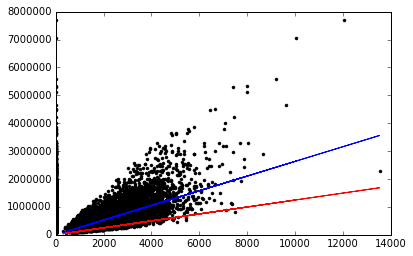

In [73]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

In [74]:
train_data,test_data = sales.random_split(.8,seed=0)
my_features = ['sqft_living']
my_output = 'price'
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, my_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, simple_weights_high_penalty)

In [75]:
RSS = 0
for i in range(0, len(test_predictions)):
    error = test_predictions[i] - test_data['price'][i]
    RSS += error * error
print RSS

6.94650232683e+14


In [87]:
train_data,test_data = sales.random_split(.8,seed=0)
my_features = ['sqft_living']
my_output = 'price'
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, my_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, simple_weights_0_penalty)
RSS = 0
for i in range(0, len(test_predictions)):
    error = test_predictions[i] - test_data['price'][i]
    RSS += error * error
print RSS

2.75723641501e+14


In [77]:
train_data,test_data = sales.random_split(.8,seed=0)
my_features = ['sqft_living']
my_output = 'price'
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, my_features, my_output)
test_predictions = predict_output(test_simple_feature_matrix, initial_weights)
RSS = 0
for i in range(0, len(test_predictions)):
    error = test_predictions[i] - test_data['price'][i]
    RSS += error * error
print RSS

1.78427328252e+15


In [78]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

In [79]:
initial_weights = np.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

In [80]:
l2_penalty = 0.0
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights,
                                                               step_size, l2_penalty, max_iterations)
print multiple_weights_0_penalty

Starting gradient descent with l2_penalty = 0.0
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 5
Cost function =  4.0567523315e+15
Iteration = 9
Cost function =  2.52956511433e+15
Iteration = 13
Cost function =  1.83855669428e+15
Iteration = 17
Cost function =  1.52567557521e+15
Iteration = 21
Cost function =  1.38378949867e+15
Iteration = 25
Cost function =  1.31923260628e+15
Iteration = 29
Cost function =  1.28964887203e+15
Iteration = 33
Cost function =  1.27588472408e+15
Iteration = 37
Cost function =  1.26927880758e+15
Iteration = 41
Cost function =  1.26591437896e+15
Iteration = 45
Cost function =  1.26402022214e+15
Iteration = 49
Cost function =  1.26279533535e+15
Iteration = 53
Cost function =  1.26187745114e+15
Iteration = 57
Cost function =  1.26110269961e+15
Iteration = 61
Cost function =  1.26039692738e+15
Iteration = 65
Cost function =  1.25972655178e+15
Iteration = 69
Cost function =  1.25907633688e+15
Iteration = 73
Cost function =  1.25843934384e+15
Iterat

In [81]:
l2_penalty = 1e11
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, 
                                                                  step_size, l2_penalty, max_iterations)
print multiple_weights_high_penalty

Starting gradient descent with l2_penalty = 1e+11
Iteration = 1
Cost function =  7.43305185103e+15
Iteration = 5
Cost function =  4.46048979029e+15
Iteration = 9
Cost function =  3.79667446884e+15
Iteration = 13
Cost function =  3.64831953044e+15
Iteration = 17
Cost function =  3.61509110322e+15
Iteration = 21
Cost function =  3.60760274251e+15
Iteration = 25
Cost function =  3.60588632216e+15
Iteration = 29
Cost function =  3.60547487453e+15
Iteration = 33
Cost function =  3.60536516777e+15
Iteration = 37
Cost function =  3.60532940218e+15
Iteration = 41
Cost function =  3.60531429504e+15
Iteration = 45
Cost function =  3.60530641814e+15
Iteration = 49
Cost function =  3.60530180648e+15
Iteration = 53
Cost function =  3.60529896493e+15
Iteration = 57
Cost function =  3.60529717505e+15
Iteration = 61
Cost function =  3.6052960339e+15
Iteration = 65
Cost function =  3.60529529859e+15
Iteration = 69
Cost function =  3.60529481846e+15
Iteration = 73
Cost function =  3.60529449908e+15
Iter

In [82]:
train_data,test_data = sales.random_split(.8,seed=0)
my_features = ['sqft_living','sqft_living15']
my_output = 'price'
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, my_features, my_output)
test_predictions1 = predict_output(test_simple_feature_matrix, multiple_weights_high_penalty)
rss = 0
for i in range(0, len(test_predictions1)):
    error = test_predictions[i] - test_data['price'][i]
    RSS += error * error
print RSS

3.56854656505e+15


In [83]:
train_data,test_data = sales.random_split(.8,seed=0)
my_features = ['sqft_living','sqft_living15']
my_output = 'price'
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, my_features, my_output)
test_predictions2 = predict_output(test_simple_feature_matrix, multiple_weights_0_penalty)
rss = 0
for i in range(0, len(test_predictions2)):
    error = test_predictions[i] - test_data['price'][i]
    RSS += error * error
print RSS

5.35281984757e+15


In [84]:
train_data,test_data = sales.random_split(.8,seed=0)
my_features = ['sqft_living','sqft_living15']
my_output = 'price'
(test_simple_feature_matrix, test_output) = get_numpy_data(test_data, my_features, my_output)
test_predictions3 = predict_output(test_simple_feature_matrix, initial_weights)
rss = 0
for i in range(0, len(test_predictions3)):
    error = test_predictions[i] - test_data['price'][i]
    RSS += error * error
print RSS

7.1370931301e+15


In [85]:
print test_predictions2[0]
print test_output[0] - test_predictions2[0]

398769.017008
-88769.0170081


In [86]:
print test_predictions1[0]
print test_output[0] - test_predictions1[0]

270450.661634
39549.3383662


In [89]:
test_output[0]

310000.0